In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [54]:
# Allows code to be hidden, for more polished viewing

from IPython.display import HTML

HTML('''<script>
  function code_toggle() {
    if (code_shown){
      $('div.input').hide('500');
      $('#toggleButton').val('Show Code')
    } else {
      $('div.input').show('500');
      $('#toggleButton').val('Hide Code')
    }
    code_shown = !code_shown
  }

  $( document ).ready(function(){
    code_shown=false;
    $('div.input').hide()
  });
</script>
<form action="javascript:code_toggle()"><input type="submit" id="toggleButton" value="Show Code"></form>''')

In [52]:
# Load file with Fractional Melting Output, from reemodel_v5.m
xl = pd.ExcelFile('SWIR_input.xlsx')

# Load sheet as numpy array
basalt_data = xl.parse('Sheet1').as_matrix()
global_data = xl.parse('Sheet2').as_matrix()
perid_data = xl.parse('Sheet3').as_matrix()
BW_data = xl.parse('Sheet4').as_matrix()
global_prim = xl.parse('Sheet6').as_matrix()


# Variables from input file
magmatic_fO2 = basalt_data[:,0] # SWIR Basalt Magmatic fO2, T=1200C P=1atm
frac_xtal_fO2 = basalt_data[:,1] # SWIR Basalt fO2, Corrected to MgO=8.0 wt%, T=1200C P=1atm
basalt_Fe3 = basalt_data[:,2] # SWIR Basalt Fe3+/tFe
basalt_MgO = basalt_data[:,3] # SWIR Basalt wt% MgO
glob_mag_fO2 = global_data[:,0] # Global MORB, magmatic fO2, T=1200C P=1atm
glob_Fe3 = global_data[:,1] # Global MORB, Fe3+/tFe
glob_MgO = global_data[:,2] # Global MORB, MgO
glob_prim_fO2PT = global_prim[:,0] # Global MORB, primitive samples with olivine added in, projected to PT
glob_prim_fO2mag = global_prim[:,1] # Global MORB, primitive samples, magmatic fO2
perid_fO2 = perid_data[:,0] # SWIR peridotite, T=~900C P=0.6Gpa
perid_fO2_BWPT = perid_data[:,1] # SWIR peridotite, T=1151C P=1Gpa
perid_T = perid_data[:,3] # SWIR peridotite temps, from Li
perid_fO2_ab = perid_data[:,4] # SWIR peridotite fO2, NOT relative to QFM
perid_CrBool = perid_data[:,5] # 0 if Cr#<30, 1 if Cr#>30
BW_paper = BW_data[:,0] # Bryndzia and Wood, 1990, data as in paper
BW_theirPT = BW_data[:,1] # Bryndzia and Wood, 1990, data using Davis method with their P,T
BW_ourPT = BW_data[:,2] # Bryndzia and Wood, 1990, data using Davis method with our P,T


# SWIR peridotite versus fO2, and some thoughts about conductive cooling

## Basalts

In order to assess basalt fO2, I calculated oxygen fugacity in three different ways for the global dataset and the SWIR dataset:

1. Magmatic fO2: Using Fe3+/tFe values calculated using the Zhang 2017 calibration, I used Kress and Carmichael (1991) to calculate magmatic fO2 at 1200 degrees C and 1 atm.
2. Source fO2: For primitive samples (>8.5 wt% MgO), I added olivine back into the magma composition until equilibrium with Fo90 was reached, in order to obtain a primary magma composition. I then used the Lee thermobarometer to calculate T and P for those samples, and Kress and Carmichael (1991) to calculate source fO2 at those pressures and temperatures.
3. Fractional crystallization corrected fO2 (SWIR dataset only, for the moment): Using SWIR segment trends for each oxide, I corrected each sample with XANES data back to 8 wt% MgO. I then used Kress and Carmichael (1991) to calculate fO2 at 1200 degrees C and 1 atm.

The results of these calculations are shown below.

The main issue here is that I only have XANES data for one primitive sample at SWIR (there are only three total samples in the Oblique Segment with measure wt% MgO >8.5). This one primitive sample lies to the reduced end of the SWIR peridotite range, even after being corrected for fractional crystallization. Thus, it's hard to assess the source oxygen fugacity for the dataset as a whole. For later parts of this discussion, I've made a "best guess" source fO2 estimation:

$$f_{O2_{bestguess}} = f_{O2_{primitive@PT}} + (f_{O2_{meanFX}}-f_{O2_{primFX}})$$

Thus, the best guess for the oxygen fugacity for the SWIR source mantle, as implied by basalts, is **-0.197 relative to QFM**, at about **1300 degrees C and 1 GPa**.


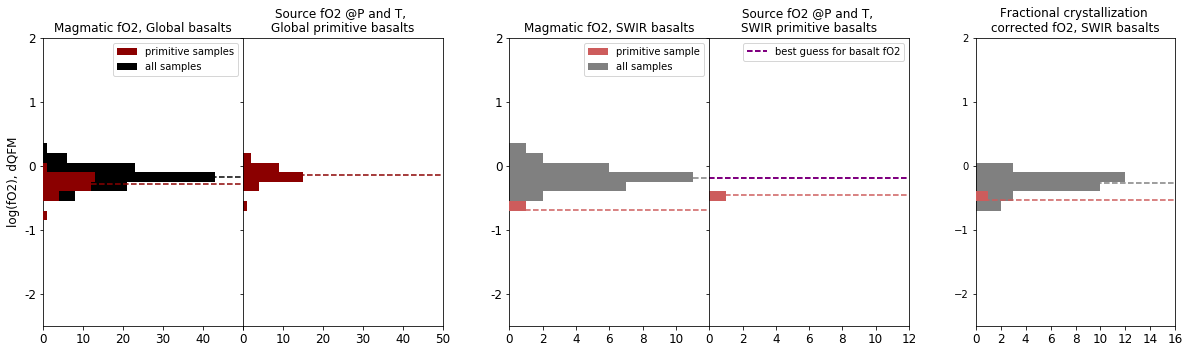

In [65]:
fig = plt.figure()
fig.set_size_inches(18.5, 5)

axes0 = fig.add_axes([0.05, 0.1, 0.15, 0.8]) # left, bottom, width, height (range 0 to 1)
axes1 = fig.add_axes([0.2, 0.1, 0.15, 0.8]) # left, bottom, width, height (range 0 to 1)
axes2 = fig.add_axes([0.4, 0.1, 0.15, 0.8]) # left, bottom, width, height (range 0 to 1)
axes3 = fig.add_axes([0.55, 0.1, 0.15, 0.8]) # left, bottom, width, height (range 0 to 1)
axes4 = fig.add_axes([0.75, 0.1, 0.15, 0.8]) # left, bottom, width, height (range 0 to 1)

#axes = fig.add_axes([0.1, 0.1, 0.8, 0.8]) # left, bottom, width, height (range 0 to 1)
#fig, axes = plt.subplots(nrows=1, ncols=4,figsize=(12,3))

binwidth = 0.15

#axes0.plot(np.linspace(0,50,10), np.linspace(0,0,10), 'k')
axes0.plot(np.linspace(0,50,10), np.linspace(np.mean(glob_prim_fO2mag),np.mean(glob_prim_fO2mag),10), '--', 
           color='darkred')
axes0.hist(glob_prim_fO2mag, bins=np.arange(-2.5, 2, binwidth), orientation='horizontal',
          color='darkred', zorder=10, label='primitive samples')  # plt.hist passes it's arguments to np.histogram
axes0.plot(np.linspace(0,50,10), np.linspace(np.mean(glob_mag_fO2),np.mean(glob_mag_fO2),10), '--', color='black')
axes0.hist(glob_mag_fO2, bins=np.arange(-2.5, 2, binwidth), orientation='horizontal',
          color='black', label='all samples')  # plt.hist passes it's arguments to np.histogram
axes0.set_title("Magmatic fO2, Global basalts", fontsize=12)
axes0.set_xlim([0, 50])
axes0.set_ylim([-2.5, 2])
axes0.set_xticks([0,10,20,30,40,50])
axes0.set_xticklabels([0,10,20,30,40], fontsize=12)
axes0.set_yticks([-2,-1,0,1,2])
axes0.set_yticklabels([-2,-1,0,1,2], fontsize=12)
axes0.set_ylabel('log(fO2), dQFM', fontsize=12)
axes0.legend()

axes1.plot(np.linspace(0,50,10), np.linspace(np.mean(glob_prim_fO2PT),np.mean(glob_prim_fO2PT),10), '--', color='darkred')
axes1.hist(glob_prim_fO2PT, bins=np.arange(-2.5, 2, binwidth), orientation='horizontal',
          color='darkred')  # plt.hist passes it's arguments to np.histogram
axes1.set_title("Source fO2 @P and T, \nGlobal primitive basalts", fontsize=12)
axes1.set_xlim([0, 50])
axes1.set_ylim([-2.5, 2])
axes1.set_xticks([0,10,20,30,40,50])
axes1.set_xticklabels([0,10,20,30,40,50], fontsize=12)
axes1.set_yticks([-2,-1,0,1,2])
axes1.set_yticklabels([], fontsize=12)

#axes1.plot(np.linspace(0,50,10), np.linspace(0,0,10), 'k')
axes2.plot(np.linspace(0,50,10), np.linspace(-0.689019,-0.689019,10), '--', color='indianred')
axes2.hist(-0.689019, bins=np.arange(-2.5, 2, binwidth), orientation='horizontal',
          color='indianred', zorder=10, label='primitive sample')  # plt.hist passes it's arguments to np.histogram
axes2.plot(np.linspace(0,50,10), np.linspace(np.mean(magmatic_fO2),np.mean(magmatic_fO2),10), '--', color='gray')
axes2.hist(magmatic_fO2, bins=np.arange(-2.5, 2, binwidth), orientation='horizontal',
          color='gray', label='all samples')  # plt.hist passes it's arguments to np.histogram
axes2.set_title("Magmatic fO2, SWIR basalts", fontsize=12)
axes2.set_xlim([0, 12])
axes2.set_ylim([-2.5, 2])
axes2.set_xticks([0,2,4,6,8,10])
axes2.set_xticklabels([0,2,4,6,8,10], fontsize=12)
axes2.set_yticks([-2,-1,0,1,2])
axes2.set_yticklabels([-2,-1,0,1,2], fontsize=12)
axes2.legend()

axes3.plot(np.linspace(0,50,10), np.linspace(-0.460963,-0.460963,10), '--', color='indianred')
axes3.hist(-0.460963, bins=np.arange(-2.5, 2, binwidth), orientation='horizontal',
          color='indianred')  # plt.hist passes it's arguments to np.histogram
basalt_fO2_bestguess = -0.460963 + (np.mean(frac_xtal_fO2) - -0.538337) # -0.197
axes3.plot(np.linspace(0,50,10), np.linspace(basalt_fO2_bestguess,basalt_fO2_bestguess,10), '--', 
           color='purple', linewidth=2, label='best guess for basalt fO2')
axes3.set_title("Source fO2 @P and T, \nSWIR primitive basalts", fontsize=12)
axes3.set_xlim([0, 12])
axes3.set_ylim([-2.5, 2])
axes3.yaxis.set_ticklabels([])
axes3.set_xticks([0,2,4,6,8,10,12])
axes3.set_xticklabels([0,2,4,6,8,10,12], fontsize=12)
axes3.set_yticks([-2,-1,0,1,2])
axes3.legend()

#axes2.plot(np.linspace(0,50,10), np.linspace(0,0,10), 'k')
axes4.plot(np.linspace(0,50,10), np.linspace(np.mean(frac_xtal_fO2),np.mean(frac_xtal_fO2),10), '--', color='gray')
axes4.hist(frac_xtal_fO2, bins=np.arange(-2.5, 2, binwidth), orientation='horizontal',
          color='gray')  # plt.hist passes it's arguments to np.histogram
axes4.plot(np.linspace(0,50,10), np.linspace(-0.538337,-0.538337,10), '--', color='indianred')
axes4.hist(-0.538337, bins=np.arange(-2.5, 2, binwidth), orientation='horizontal',
          color='indianred', zorder=10)  # plt.hist passes it's arguments to np.histogram
axes4.set_title("Fractional crystallization \ncorrected fO2, SWIR basalts", fontsize=12)
axes4.set_xlim([0, 16])
axes4.set_ylim([-2.5, 2])
axes4.set_xticks([0,2,4,6,8,10,12,14,16])
axes4.set_xticklabels([0,2,4,6,8,10,12,14,16], fontsize=12)
axes4.set_yticks([-2,-1,0,1,2])



plt.savefig("SWIR_hist.eps", format="eps")
plt.show()


## Peridotites

In order to assess peridotite fO2, I calculated the global data (Bryndzia and Wood, 1990) and SWIR data in two different ways:

1. 1150 C, 1 GPa: I calculated both datasets at 1150 degrees C and 1 GPa in order to be maximally consistent with the published Bryndzia and Wood dataset.
2. Li temps, 0.6 GPa: I also calculated both datasets at the temperature implied by olivine-spinel geothermometry (Li et al., 1995) and a pressure of 0.6 GPa (broadly consistent with the SWIR geotherm).

The results of these calculations are shown below. 

The higher fO2 (relative to QFM) of each dataset at lower P,T is an effect of three things:
1. All else being equal, lower pressure will result in higher fO2.
2. All else being equal, lower temperature will result in higher fO2.
3. All else being equal, lower pressure and temperature will result in higher $a_{Fe3O4}$

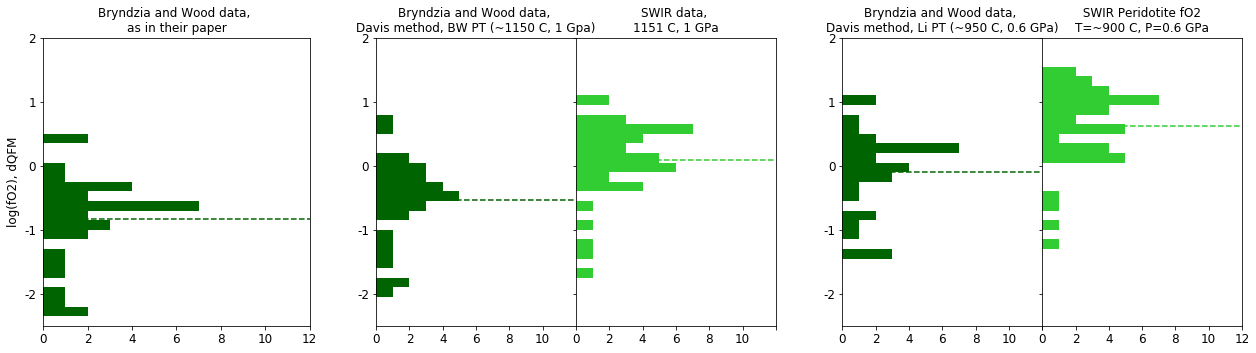

In [21]:
fig = plt.figure()
fig.set_size_inches(18.5, 5)

axes0 = fig.add_axes([0.05, 0.1, 0.2, 0.8]) # left, bottom, width, height (range 0 to 1)
axes1 = fig.add_axes([0.3, 0.1, 0.15, 0.8]) # left, bottom, width, height (range 0 to 1)
axes2 = fig.add_axes([0.45, 0.1, 0.15, 0.8]) # left, bottom, width, height (range 0 to 1)
axes3 = fig.add_axes([0.65, 0.1, 0.15, 0.8]) # left, bottom, width, height (range 0 to 1)
axes4 = fig.add_axes([0.8, 0.1, 0.15, 0.8]) # left, bottom, width, height (range 0 to 1)

#axes = fig.add_axes([0.1, 0.1, 0.8, 0.8]) # left, bottom, width, height (range 0 to 1)
#fig, axes = plt.subplots(nrows=1, ncols=4,figsize=(12,3))

binwidth = 0.15

#axes0.plot(np.linspace(0,50,10), np.linspace(0,0,10), 'k')
axes0.plot(np.linspace(0,50,10), np.linspace(np.mean(BW_paper),np.mean(BW_paper),10), '--',color='darkgreen')
axes0.hist(BW_paper, bins=np.arange(-2.5, 2, binwidth), orientation='horizontal', color='darkgreen')  # plt.hist passes it's arguments to np.histogram
axes0.set_title("Bryndzia and Wood data, \nas in their paper", fontsize=12)
axes0.set_xlim([0, 12])
axes0.set_ylim([-2.5, 2])
axes0.set_xticks([0,2,4,6,8,10,12])
axes0.set_xticklabels([0,2,4,6,8,10,12], fontsize=12)
axes0.set_yticks([-2,-1,0,1,2])
axes0.set_yticklabels([-2,-1,0,1,2], fontsize=12)
axes0.set_ylabel("log(fO2), dQFM", fontsize=12)

#axes1.plot(np.linspace(0,50,10), np.linspace(0,0,10), 'k')
axes1.plot(np.linspace(0,50,10), np.linspace(np.mean(BW_theirPT),np.mean(BW_theirPT),10), '--',color='darkgreen')
axes1.hist(BW_theirPT, bins=np.arange(-2.5, 2, binwidth), orientation='horizontal', color='darkgreen')  # plt.hist passes it's arguments to np.histogram
axes1.set_title("Bryndzia and Wood data, \nDavis method, BW PT (~1150 C, 1 Gpa)", fontsize=12)
axes1.set_xlim([0, 12])
axes1.set_ylim([-2.5, 2])
axes1.set_xticks([0,2,4,6,8,10])
axes1.set_xticklabels([0,2,4,6,8,10], fontsize=12)
axes1.set_yticks([-2,-1,0,1,2])
axes1.set_yticklabels([-2,-1,0,1,2], fontsize=12)

axes2.plot(np.linspace(0,50,10), np.linspace(np.mean(perid_fO2_BWPT),np.mean(perid_fO2_BWPT),10), '--',color='limegreen')
axes2.hist(perid_fO2_BWPT, bins=np.arange(-2.5, 2, binwidth), orientation='horizontal', color='limegreen')  # plt.hist passes it's arguments to np.histogram
axes2.set_title("SWIR data, \n1151 C, 1 GPa", fontsize=12)
axes2.set_xlim([0, 12])
axes2.set_ylim([-2.5, 2])
axes2.yaxis.set_ticklabels([])
axes2.set_xticks([0,2,4,6,8,10,12])
axes2.set_xticklabels([0,2,4,6,8,10], fontsize=12)
axes2.set_yticks([-2,-1,0,1,2])
axes2.set_yticklabels([])


#axes2.plot(np.linspace(0,50,10), np.linspace(0,0,10), 'k')
axes3.plot(np.linspace(0,50,10), np.linspace(np.mean(BW_ourPT),np.mean(BW_ourPT),10), '--',color='darkgreen')
axes3.hist(BW_ourPT, bins=np.arange(-2.5, 2, binwidth), orientation='horizontal', color='darkgreen')  # plt.hist passes it's arguments to np.histogram
axes3.set_title("Bryndzia and Wood data, \nDavis method, Li PT (~950 C, 0.6 GPa)", fontsize=12)
axes3.set_xlim([0, 12])
axes3.set_ylim([-2.5, 2])
axes3.yaxis.set_ticklabels([])
axes3.set_xticks([0,2,4,6,8,10,12])
axes3.set_xticklabels([0,2,4,6,8,10], fontsize=12)
axes3.set_yticks([-2,-1,0,1,2])
axes3.set_yticklabels([-2,-1,0,1,2], fontsize=12)

#axes3.plot(np.linspace(0,50,10), np.linspace(0,0,10), 'k')
axes4.plot(np.linspace(0,50,10), np.linspace(np.mean(perid_fO2),np.mean(perid_fO2),10), '--',color='limegreen')
axes4.hist(perid_fO2, np.arange(-2.5, 2, binwidth), orientation='horizontal', color='limegreen')  # plt.hist passes it's arguments to np.histogram
axes4.set_title(" SWIR Peridotite fO2 \nT=~900 C, P=0.6 GPa", fontsize=12)
axes4.set_xlim([0, 12])
axes4.set_ylim([-2.5, 2])
axes4.set_xticks([0,2,4,6,8,10,12])
axes4.set_xticklabels([0,2,4,6,8,10,12], fontsize=12)
axes4.set_yticks([-2,-1,0,1,2])
axes4.set_yticklabels([])

plt.savefig("SWIR_perid_hist.eps", format="eps")
plt.show()

## So what's the offset???

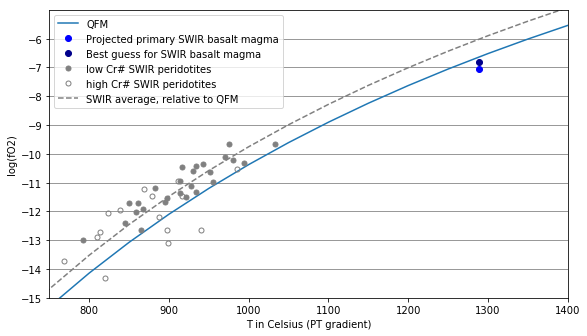

In [71]:
T = np.arange(600,1500,50) # T from 600 to 1500 C
P = np.arange(3,12,0.5) # P from 3kbar=0.3GPa to 12kbar=1.2GPa

QFM = -25096.3/(T+273)+8.735+0.11*((P*1000-1)/(T+273))
fO2_50_07 = -11.35827922
T_50_07 = 914.1663643

fO2_basalt = -7.07
T_basalt = 1289

projected_50_07 = np.array([-13.34030857,
-12.41861053,
-11.57668796,
-10.8046411,
-10.09410747,
-9.43800653,
-8.830291467,
-8.265778134,
-7.739997077,
-7.249070174,
-6.789626656,
-6.358715902,
-5.953747939])
projected_T = np.arange(800,1450,50)

projected_perid_Mgsp = np.array([-13.58409757,
-13.07021002,
-12.51234808,
-11.94103105,
-11.35776631,
-10.76162645,
-10.15134492,
-9.525498153,
-8.882493678,
-8.220534667,
-7.537562641,
-6.831195926,
-6.096263974])

projected_T_Mgsp = np.array([786.2561616,
814.4756681,
844.954299,
878.0204981,
914.0710457,
953.5900856,
997.1749294,
1045.571642,
1099.725045,
1160.850471,
1230.53921,
1310.917731,
1404.89574])

projected_perid_AlFesp = np.array([-24.32159998,
-11.05261614,
-9.517345087,
-8.470546444,
-7.617385245,
-6.865460628,
-6.173615707,
-5.519911531,
-4.891286453,
-4.279344698,
-3.678403545,
-3.084482086,
-2.494704224])

projected_T_AlFesp = np.array([887.3257487,
918.4265895,
951.2403465,
985.9125384,
1022.605647,
1061.501665,
1102.805112,
1146.746634,
1193.587312,
1243.623852,
1297.194879,
1354.688609,
1416.552272])

fig = plt.figure()
fig.set_size_inches(9, 5)
axes = fig.add_axes([0.1, 0.1, 0.8, 0.8]) # left, bottom, width, height (range 0 to 1)

axes.plot(T,QFM, label='QFM')
axes.plot(T_basalt, fO2_basalt, 'bo', label='Projected primary SWIR basalt magma')
axes.plot(T_basalt, fO2_basalt+(np.mean(frac_xtal_fO2) - -0.538337), 'o', 
          color= 'darkblue', label='Best guess for SWIR basalt magma')
axes.plot(perid_T[perid_CrBool==0], perid_fO2_ab[perid_CrBool==0], 'o', color='gray', markersize=5, label='low Cr# SWIR peridotites')
axes.plot(perid_T[perid_CrBool==1], perid_fO2_ab[perid_CrBool==1], 'o', markerfacecolor='none', 
          markeredgecolor = 'gray', markersize=5, label='high Cr# SWIR peridotites')
axes.plot(T,QFM+0.62, '--', color='gray', label='SWIR average, relative to QFM')

#axes.set_yscale('log')   
axes.set_ylim([-15, -5])
axes.set_xlim([750, 1400])
#axes.set_xticks(elements)
#axes.set_xticklabels(el_names, fontsize=10)
axes.set_yticks(np.arange(-15,-5,1))
axes.set_xlabel('T in Celsius (PT gradient)')
axes.set_ylabel('log(fO2)')
#axes.set_title('REE plotter')
axes.yaxis.grid(b=True, which='major', color='gray', linestyle='-')
axes.legend()

plt.show()
    

## Conductive Cooling of Peridotites

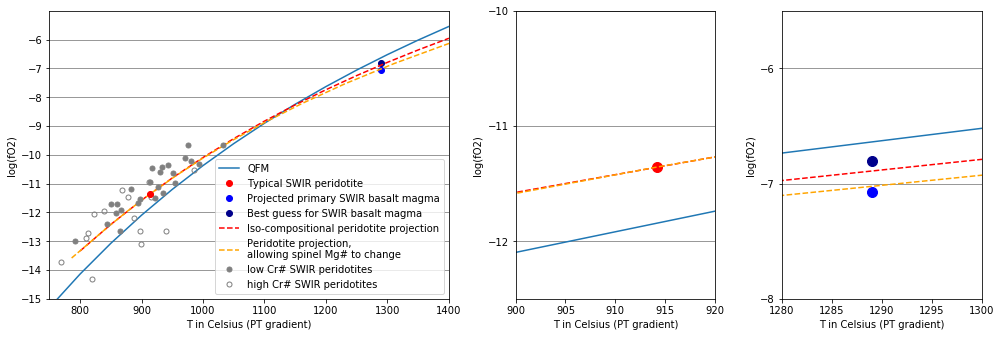

In [36]:
T = np.arange(600,1500,50) # T from 600 to 1500 C
P = np.arange(3,12,0.5) # P from 3kbar=0.3GPa to 12kbar=1.2GPa

QFM = -25096.3/(T+273)+8.735+0.11*((P*1000-1)/(T+273))
fO2_50_07 = -11.35827922
T_50_07 = 914.1663643

fO2_basalt = -7.07
T_basalt = 1289

projected_50_07 = np.array([-13.34030857,
-12.41861053,
-11.57668796,
-10.8046411,
-10.09410747,
-9.43800653,
-8.830291467,
-8.265778134,
-7.739997077,
-7.249070174,
-6.789626656,
-6.358715902,
-5.953747939])
projected_T = np.arange(800,1450,50)

projected_perid_Mgsp = np.array([-13.58409757,
-13.07021002,
-12.51234808,
-11.94103105,
-11.35776631,
-10.76162645,
-10.15134492,
-9.525498153,
-8.882493678,
-8.220534667,
-7.537562641,
-6.831195926,
-6.096263974])

projected_T_Mgsp = np.array([786.2561616,
814.4756681,
844.954299,
878.0204981,
914.0710457,
953.5900856,
997.1749294,
1045.571642,
1099.725045,
1160.850471,
1230.53921,
1310.917731,
1404.89574])

projected_perid_AlFesp = np.array([-24.32159998,
-11.05261614,
-9.517345087,
-8.470546444,
-7.617385245,
-6.865460628,
-6.173615707,
-5.519911531,
-4.891286453,
-4.279344698,
-3.678403545,
-3.084482086,
-2.494704224])

projected_T_AlFesp = np.array([887.3257487,
918.4265895,
951.2403465,
985.9125384,
1022.605647,
1061.501665,
1102.805112,
1146.746634,
1193.587312,
1243.623852,
1297.194879,
1354.688609,
1416.552272])

fig = plt.figure()
fig.set_size_inches(18.5, 5)
axes = fig.add_axes([0.1, 0.1, 0.3, 0.8]) # left, bottom, width, height (range 0 to 1)
axes2 = fig.add_axes([0.45, 0.1, 0.15, 0.8]) # left, bottom, width, height (range 0 to 1)
axes3 = fig.add_axes([0.65, 0.1, 0.15, 0.8]) # left, bottom, width, height (range 0 to 1)

axes.plot(T,QFM, label='QFM')
axes.plot(T_50_07, fO2_50_07, 'ro', zorder=10, label='Typical SWIR peridotite')
axes.plot(T_basalt, fO2_basalt, 'bo', label='Projected primary SWIR basalt magma')
axes.plot(T_basalt, fO2_basalt+(np.mean(frac_xtal_fO2) - -0.538337), 'o', 
          color= 'darkblue', label='Best guess for SWIR basalt magma')
axes.plot(projected_T, projected_50_07, 'r--', label='Iso-compositional peridotite projection')
axes.plot(projected_T_Mgsp, projected_perid_Mgsp, '--', color='orange', 
          label='Peridotite projection, \nallowing spinel Mg# to change')
#axes.plot(projected_T_AlFesp, projected_perid_AlFesp, '--', color='sienna', 
          #label='Peridotite projection, allowing spinel Al,Fe3+ to change')
axes.plot(perid_T[perid_CrBool==0], perid_fO2_ab[perid_CrBool==0], 'o', color='gray', markersize=5, label='low Cr# SWIR peridotites')
axes.plot(perid_T[perid_CrBool==1], perid_fO2_ab[perid_CrBool==1], 'o', markerfacecolor='none', 
          markeredgecolor = 'gray', markersize=5, label='high Cr# SWIR peridotites')

#axes.set_yscale('log')   
axes.set_ylim([-15, -5])
axes.set_xlim([750, 1400])
#axes.set_xticks(elements)
#axes.set_xticklabels(el_names, fontsize=10)
axes.set_yticks(np.arange(-15,-5,1))
axes.set_xlabel('T in Celsius (PT gradient)')
axes.set_ylabel('log(fO2)')
#axes.set_title('REE plotter')
axes.yaxis.grid(b=True, which='major', color='gray', linestyle='-')
axes.legend()

axes2.plot(T,QFM)
axes2.plot(T_50_07, fO2_50_07, 'ro', markersize=10)
#axes2.errorbar(T_50_07, 0.63, yerr=0.62, fmt='o', capsize=10)
#axes2.fill_between(projected_T, projected_50_07+0.131913899-0.62, projected_50_07+0.131913899+0.62,
                  #color='lightgray')
axes2.plot(projected_T, projected_50_07, 'r--')
axes2.plot(projected_T_Mgsp, projected_perid_Mgsp, '--', color='orange')
  
axes2.set_ylim([-12.50, -10])
axes2.set_xlim([900, 920])
axes2.set_yticks([-12,-11,-10])
axes2.set_xlabel('T in Celsius (PT gradient)')
axes2.set_ylabel('log(fO2)')
axes2.yaxis.grid(b=True, which='major', color='gray', linestyle='-')

axes3.plot(T,QFM)
axes3.plot(T_basalt, fO2_basalt, 'bo',markersize=10)
axes3.plot(T_basalt, fO2_basalt+(np.mean(frac_xtal_fO2) - -0.538337), 'o', 
          color= 'darkblue', markersize=10, label='Best guess for SWIR basalt magma')
axes3.plot(projected_T, projected_50_07, 'r--')
axes3.plot(projected_T_Mgsp, projected_perid_Mgsp, '--', color='orange')
  
axes3.set_ylim([-8, -5.5])
axes3.set_xlim([1280, 1300])
axes3.set_yticks([-8,-7,-6])
axes3.set_xlabel('T in Celsius (PT gradient)')
axes3.set_ylabel('log(fO2)')
axes3.yaxis.grid(b=True, which='major', color='gray', linestyle='-')

plt.savefig('fO2_PT.eps')
plt.show()
    

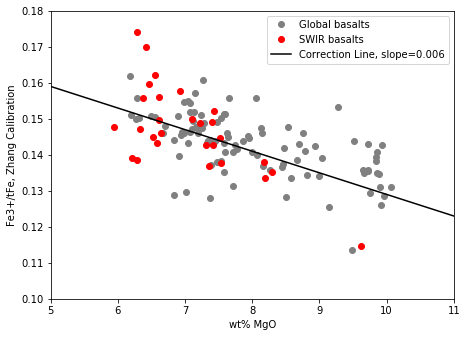

In [62]:
fig = plt.figure()
fig.set_size_inches(7, 5)
axes = fig.add_axes([0.1, 0.1, 0.8, 0.8]) # left, bottom, width, height (range 0 to 1)

axes.plot(glob_MgO, glob_Fe3, 'o', color='gray', label='Global basalts')
axes.plot(basalt_MgO, basalt_Fe3, 'o', color='red', label='SWIR basalts')
axes.plot(np.arange(5,12,1), -0.006*np.arange(5,12,1)+0.189, 'k', label='Correction Line, slope=0.006')

axes.set_ylim([0.1, 0.18])
axes.set_xlim([5, 11])
axes.set_xlabel('wt% MgO')
axes.set_ylabel('Fe3+/tFe, Zhang Calibration')
axes.legend()

plt.savefig('Fe3_MgO.eps')
plt.show()
